In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df['year'] = pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [6]:
idx = df['year'] > pd.to_datetime('1970-01-01')
df = df[idx]
df.sample(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
346567,1972-08-01,16.996,0.359,Monaco,1972-08-01
234679,1976-01-01,22.044,0.313,Honduras,1976-01-01
441001,1972-11-01,27.240,0.191,Saint Lucia,1972-11-01


In [0]:
df_t_avg = df.groupby(['Country', pd.Grouper(key='year', freq='1Y')]).agg({
    'AverageTemperature':[np.mean, np.median]
})

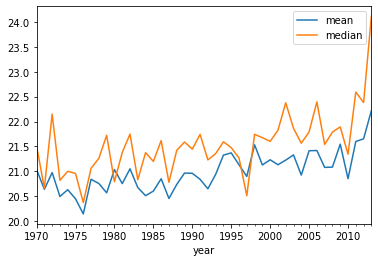

In [13]:
df_t_avg.xs('Mexico', level='Country')['AverageTemperature'].plot()

In [0]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()

In [0]:
df_t_med['date'] = df_t_med['year'].dt.year

In [0]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)

In [24]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.sample(1)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1975,13.513,24.8045,12.3595,23.074,26.651,10.4105,22.421,26.478,26.334,15.1515,10.216,28.114,8.86,21.42,5.8655,12.2135,25.9255,25.563,25.686,27.3305,26.456,6.9855,8.4725,25.863,26.7795,14.1455,21.852,27.4675,10.3755,23.1615,25.177,26.2985,11.1605,26.9675,25.438,19.8435,27.07,24.0085,-4.317,23.781,...,22.126,1.8425,13.6235,12.357,27.245,27.7055,25.904,-10.178,19.0535,2.369,6.403,19.0685,23.4175,5.1,22.5975,26.8635,26.44,26.3395,23.9175,26.1995,19.129,12.686,15.296,26.823,22.9845,9.43,27.699,8.1145,8.2045,7.906,17.181,13.3395,24.979,24.99,26.2985,20.5175,26.1155,21.8635,21.791,6.017


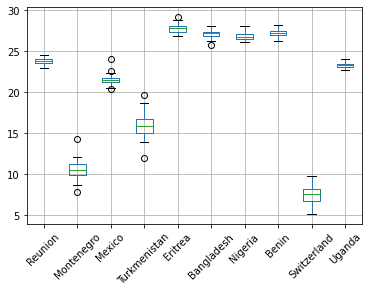

In [31]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)